<h1 align=center>Заметки к SpectrumId</h1>

## Адаптация peakdeco
МГУшная програмулина, написано коряво, разобраться тяжело. Делает поиск пиков на основании TSpectrum root, gsl, Minuit2. Точнее, пока не уверен засчет чего конкретно делается поиск пиков. Судя по описанию две возможности использовать TSpectrum и авторский алгоритм основанный изначально для поиска фона. Попробуем его разобрать.

### Автор основывается на распределении Пуассона
Не очень понятно зачем. Сравним его с Гауссовым распределением:


In [1]:
#include "TRandom.h"
#include "TH1D.h"
#include "TCanvas.h"
#include <sstream>

auto h = new TH1D(); //PoisGen(10, 10000);
auto f = new TF1("gaus","[0]*TMath::Gaus(x,[1],[2])",-5,20);

In [2]:
TH1D* PoisGen(int k, int n) {

  auto r = new TRandom();
  
  std::stringstream tit;
  tit << "PoisonDistr(" << k << "). Size=" << n;
  
  auto gr = new TH1D(tit.str().c_str(), tit.str().c_str(), n, -k/2,2*k);
    for (auto i = 0; i < n; ++i)
      gr->Fill(r->PoissonD(k));    
    
    return gr;
}


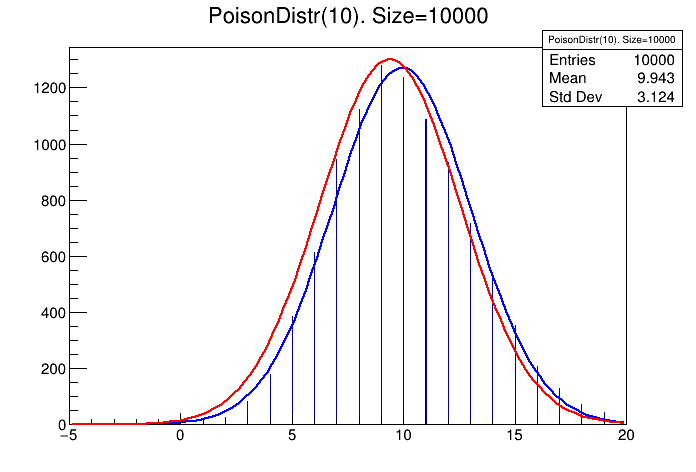

Warning in <TROOT::Append>: Replacing existing TH1: PoisonDistr(10). Size=10000 (Potential memory leak).


In [9]:
h = PoisGen(10, 10000);
f->SetParameters(1300,9.4, 3.14);
f->SetLineColor(2);
//h->Fit(f);
f->Draw("same");
c1->Draw()

Интересно, что автоматический фит(синяя линия) так и не может идеально подогнать как вручную(красная). В любом случае, отлично видно, что распределение пуассона прекрасно фитируется гауссовым, то есть начиная с каких-то чисел заменимо, при sigma = sqrt(avg) в нашем случае точно. Зачем тогда использовать пуассона? Более того, в распределении Гаусса мы имеем два параметра для фитирования пика, следовательно можем сделать это точнее. Еще один очевидный факт, который хорошо просматривается здесь. Дисперсия не равна FWHM:

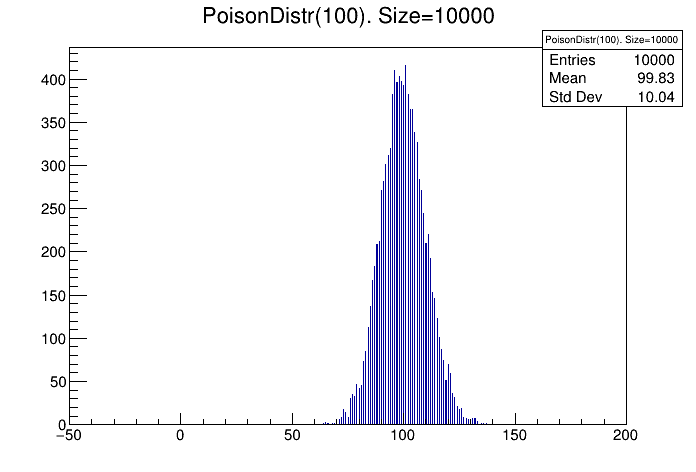

Warning in <TROOT::Append>: Replacing existing TH1: PoisonDistr(100). Size=10000 (Potential memory leak).


In [14]:
h = PoisGen(100, 10000);
h->Draw();
c1->Draw();    

## Фитирование фона

Итак у нас есть три алгоритма:
* авторский (peakdeco)
* TSpectrum
* Злоказов (не уверен, что он говорит именно про фон)
Для начала давайте разберемся что это за задача и зачем она нужна:
### Цель фитирования фона
### Типы фонов
### Подходы и методы фитирования фона